<a href="https://colab.research.google.com/github/susan291-gifs/SussieAssignment/blob/main/HousePriceForecast_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

###Problem 1

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')


selected_features = ['GrLivArea', 'YearBuilt']
target_variable = 'SalePrice'
selected_data = df[selected_features + [target_variable]]


print(selected_data.head())

   GrLivArea  YearBuilt  SalePrice
0       1710       2003     208500
1       1262       1976     181500
2       1786       2001     223500
3       1717       1915     140000
4       2198       2000     250000


###Problem 2

Mean Squared Error: 2314465092.732015


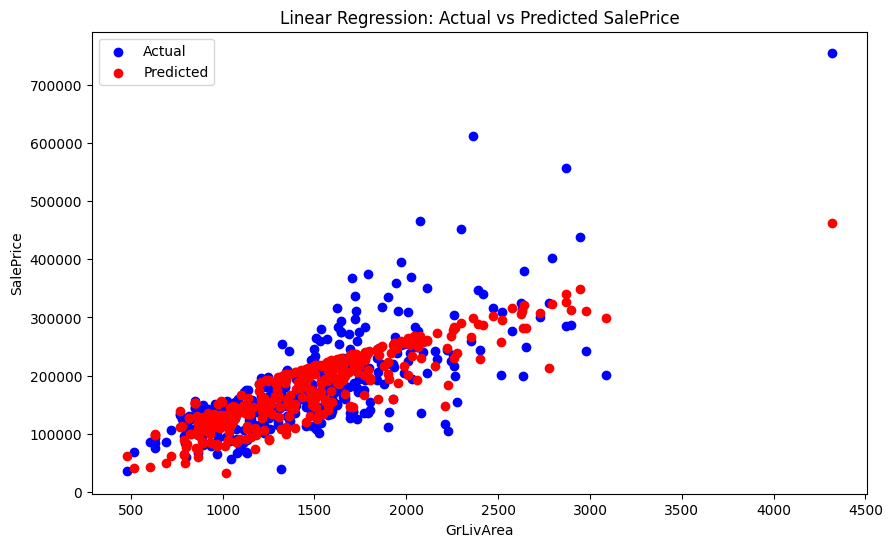

In [ ]:
X = selected_data[selected_features]
y = selected_data[target_variable]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)


linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)


y_pred = linear_reg.predict(X_val)


mse = mean_squared_error(y_val, y_pred)
print("Mean Squared Error:", mse)


plt.figure(figsize=(10, 6))
plt.scatter(X_val['GrLivArea'], y_val, color='blue', label='Actual')
plt.scatter(X_val['GrLivArea'], y_pred, color='red', label='Predicted')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('Linear Regression: Actual vs Predicted SalePrice')
plt.legend()
plt.show()

###Problem 3

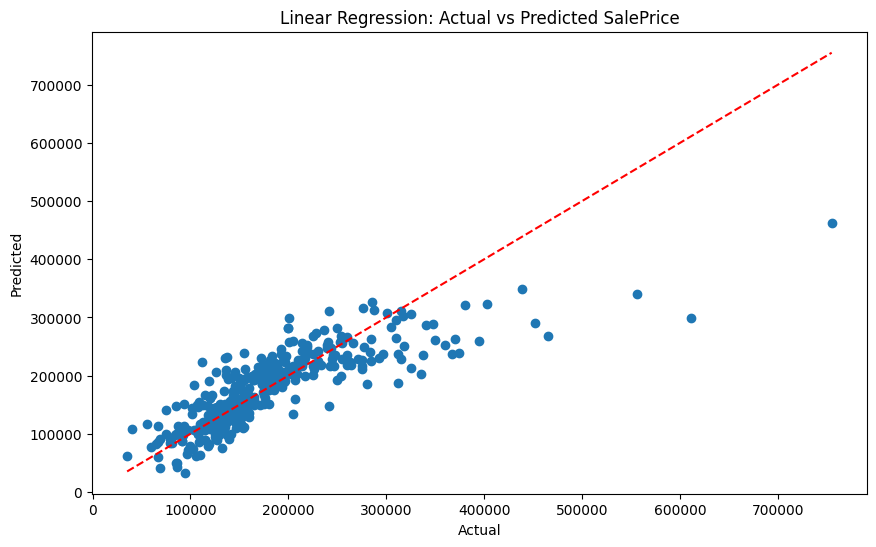

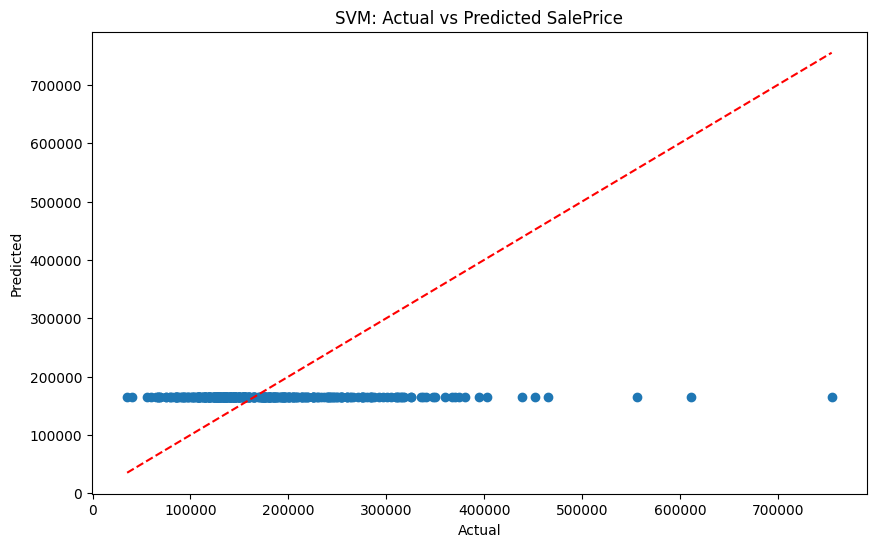

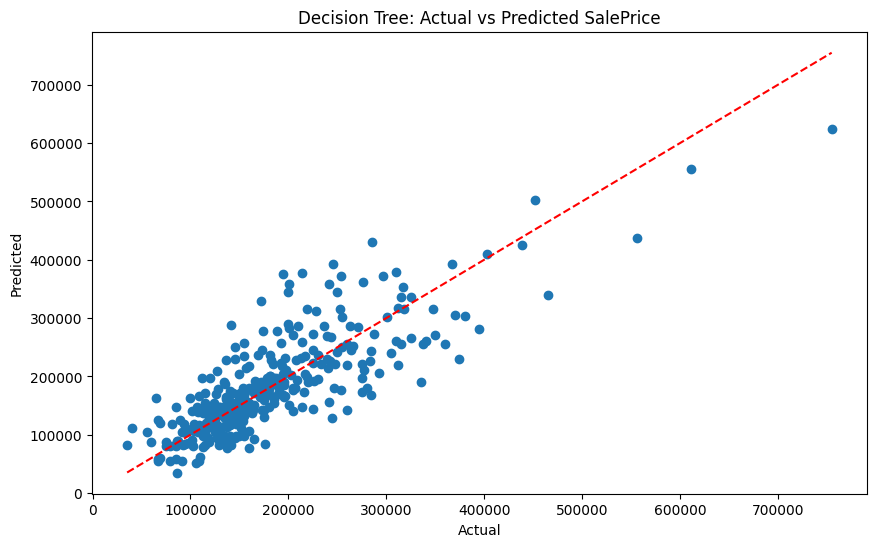

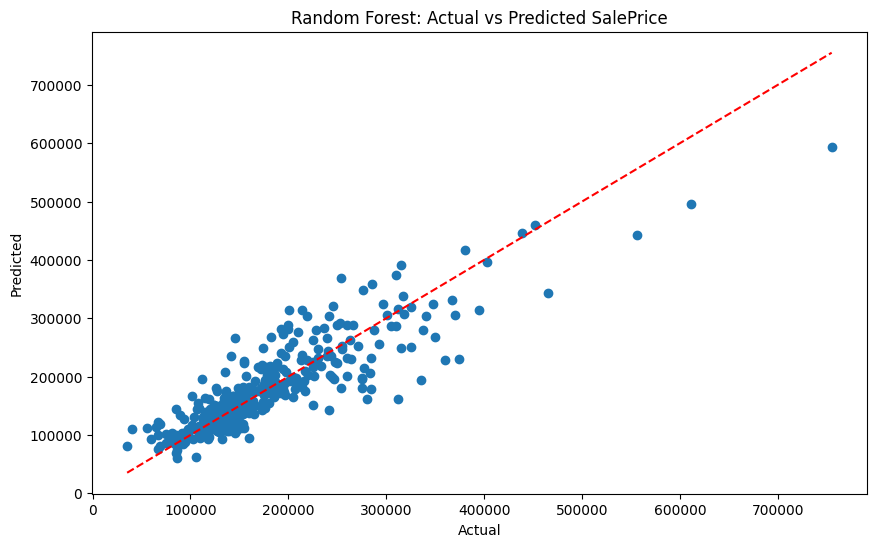

                   Mean Squared Error
Linear Regression        2.314465e+09
SVM                      7.171026e+09
Decision Tree            2.489261e+09
Random Forest            1.659656e+09


In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'SVM': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}


results = {}
for name, model in models.items():

    model.fit(X_train, y_train)


    y_pred = model.predict(X_val)

    mse = mean_squared_error(y_val, y_pred)
    results[name] = mse


    plt.figure(figsize=(10, 6))
    plt.scatter(y_val, y_pred)
    plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], '--', color='red')  # Diagonal line
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{name}: Actual vs Predicted SalePrice')
    plt.show()


results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Mean Squared Error'])
print(results_df)